In [1]:
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import pandas as pd 
from pathlib import Path
import tiling_disk_plots as tdp
import tiling_disk_utils as tdu
sns.set_context("talk")

In [2]:
db_path = Path('.') / 'MSA' / 'Logger_MADMAX.db'
# conn = sqlite3.connect(db_path)
# c= conn.cursor()

### Select T Data for the Lao 1 Point Test Date: 18-19.10.2021

In [3]:
one_point_db = tdu.query_temps_from_db(db_path,'2021-10-18 16:15:49', '2021-10-19 07:01:58')
one_point_db = tdu.add_unix_to_db_df(one_point_db)

In [4]:
one_point_db

,date,T_plate,T_ambient,humidity,dewpoint,fan_speed,time,unix_time,time_h
0,2021-10-18 16:16:00,24.9,24.1,39.6,9.5,80,16:16:00,1634566560,0.000000
1,2021-10-18 16:17:00,24.9,24.1,39.4,9.4,80,16:17:00,1634566620,0.016667
2,2021-10-18 16:18:00,24.8,24.1,39.1,9.3,80,16:18:00,1634566680,0.033333
3,2021-10-18 16:19:00,24.8,24.1,39.0,9.2,80,16:19:00,1634566740,0.050000
4,2021-10-18 16:20:00,24.8,24.1,38.7,9.1,80,16:20:00,1634566800,0.066667
...,...,...,...,...,...,...,...,...,...
881,2021-10-19 06:57:00,24.8,24.6,42.5,11.0,80,06:57:00,1634619420,14.683333
882,2021-10-19 06:58:00,24.8,24.7,43.0,11.3,80,06:58:00,1634619480,14.700000
883,2021-10-19 06:59:00,24.8,24.8,43.2,11.4,80,06:59:00,1634619540,14.716667
884,2021-10-19 07:00:00,24.9,24.9,43.0,11.4,80,07:00:00,1634619600,14.733333


Text(0, 0.5, 'T [°C]')

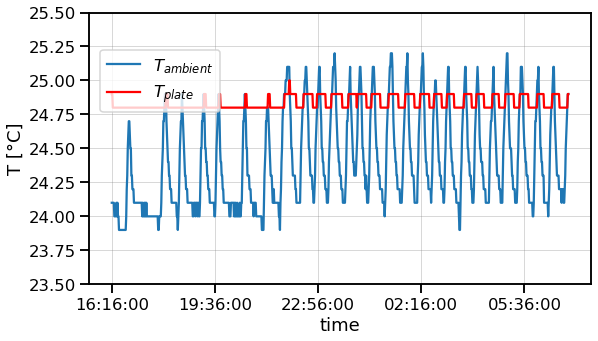

In [ ]:
fig, ax = plt.subplots(figsize=(9,5), nrows=1, ncols=1)
l1 = one_point_db.plot(x="time", y="T_ambient", legend=False, ax=ax, label="$T_{ambient}$")
l2 = one_point_db.plot(x="time", y="T_plate", ax=ax, legend=False, label="$T_{plate}$", color="r")
# ax2 = ax.twinx()
# l3 = one_point_move_db.plot(x="time", y="humidity", ax=ax2, legend=False, label="humidity", color="tab:cyan")

ax.set_ylim(23.5, 25.5)
# ax2.set_ylim(23.5, 25.5)
# ax2.set_yticklabels([])
# ax2.set_yticks([])
fig.legend(bbox_to_anchor=(0.34, 0.8), loc="upper right")
plt.grid(c="grey", ls="-", lw=1, alpha=0.3)
ax.set_ylabel("T [°C]")
# # ax2 = ax.twiny()
# # ax2.set_xlabel('time [h]')
# # ax2.set_xticklabels(one_point_db['time_h'])
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('best') 
# plt.show()

Text(0, 0.5, 'humidity [%]')

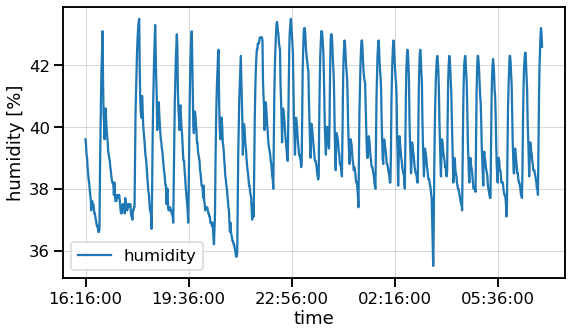

In [ ]:
ax = one_point_db.plot(x="time", y="humidity", figsize=(9,5))
plt.grid(c="grey", ls="-", lw=1, alpha=0.3)
ax.set_ylabel("humidity [%]")

### corralation plot T and humidity

In [ ]:
import tiling_disk_utils as tdu
lao_1p_night = tdu.read_single_measurement('MSA', '20211020_msa_1point_lao_night.txt')
mean_1p_night = np.mean(lao_1p_night['z'])
lao_1p_night["unix_time"] = lao_1p_night["unix_time"].apply(lambda x: float(x)) 
lao_1p_night['z'] = lao_1p_night['z'].apply(lambda x: (x-mean_1p_night) *1e3) 

#lao_1p_night["time_valid"] = np.where(lao_1p_night["unix_time"] == one_point_db["unix_time"], True, False)
#one_point_db["z"] = lao_1p_night["z"][lao_1p_night["time_valid"]==True]


In [ ]:
lao_1p_night["unix_time"]

0         1.634740e+09
1         1.634740e+09
2         1.634740e+09
3         1.634740e+09
4         1.634740e+09
              ...     
239993    1.634796e+09
239994    1.634796e+09
239995    1.634796e+09
239996    1.634796e+09
239997    1.634796e+09
Name: unix_time, Length: 239998, dtype: float64

In [ ]:
one_point_db["unix_time"]

0      1.634567e+09
1      1.634567e+09
2      1.634567e+09
3      1.634567e+09
4      1.634567e+09
           ...     
881    1.634619e+09
882    1.634619e+09
883    1.634620e+09
884    1.634620e+09
885    1.634620e+09
Name: unix_time, Length: 886, dtype: float64

In [ ]:
# one_point_db.insert(value=lao_1p_night['unix_time'], column='time_temp', loc=1)
one_point_db

,date,time_temp,T_plate,T_ambient,humidity,dewpoint,fan_speed,time,unix_time,time_h
0,2021-10-18 16:16:00,1.634740e+09,24.9,24.1,39.6,9.5,80,16:16:00,1.634567e+09,0.000000
1,2021-10-18 16:17:00,1.634740e+09,24.9,24.1,39.4,9.4,80,16:17:00,1.634567e+09,0.016667
2,2021-10-18 16:18:00,1.634740e+09,24.8,24.1,39.1,9.3,80,16:18:00,1.634567e+09,0.033333
3,2021-10-18 16:19:00,1.634740e+09,24.8,24.1,39.0,9.2,80,16:19:00,1.634567e+09,0.050000
4,2021-10-18 16:20:00,1.634740e+09,24.8,24.1,38.7,9.1,80,16:20:00,1.634567e+09,0.066667
...,...,...,...,...,...,...,...,...,...,...
881,2021-10-19 06:57:00,1.634740e+09,24.8,24.6,42.5,11.0,80,06:57:00,1.634619e+09,14.683333
882,2021-10-19 06:58:00,1.634740e+09,24.8,24.7,43.0,11.3,80,06:58:00,1.634619e+09,14.700000
883,2021-10-19 06:59:00,1.634740e+09,24.8,24.8,43.2,11.4,80,06:59:00,1.634620e+09,14.716667
884,2021-10-19 07:00:00,1.634740e+09,24.9,24.9,43.0,11.4,80,07:00:00,1.634620e+09,14.733333


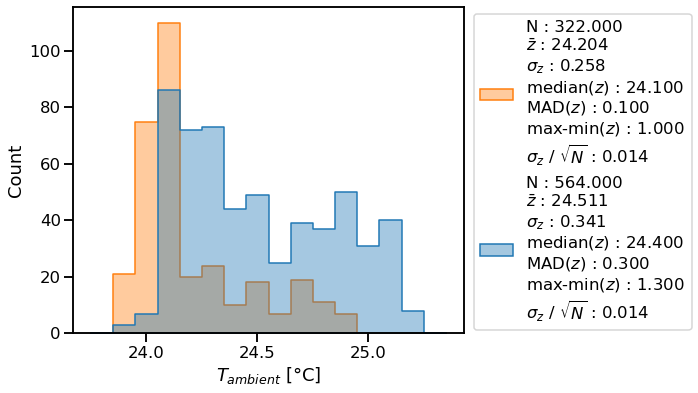

In [ ]:
from scipy import stats
from astropy.stats import knuth_bin_width
%matplotlib inline

data = one_point_db.query('time_h < 5.36')
_,label = tdp.hist_label_data(data['T_ambient'])
nbins = np.array(np.arange(23.8,25.5,0.1))-0.05
fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_ambient'],bins=nbins, kde=False, color='tab:orange',  ax=ax, element='step',  label=label, fill=True, alpha=0.4)


data = one_point_db.query('time_h > 5.36')
_,label = tdp.hist_label_data(data['T_ambient'])
# nbins = np.array(np.arange(24.5,25.5,0.1)) -0.5
# fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_ambient'],bins=nbins, kde=False,  ax=ax, element='step',  label=label, fill=True, alpha=0.4, color="tab:blue")

ax.set_xlabel('$T_{ambient}$ [°C]')
plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right', borderaxespad=0.4)

### Select T Data for the Lao 1 Point Test Date: 20-21.10.2021

In [5]:
one_point_move_db = tdu.query_temps_from_db(db_path,'2021-10-20 16:27:49', '2021-10-21 07:57:05' )


In [6]:
one_point_move_db

,date,T_plate,T_ambient,humidity,dewpoint,fan_speed,time
0,2021-10-20 16:28,24.8,24.1,41.0,10.0,80,16:28:00
1,2021-10-20 16:29,24.8,24.1,41.0,10.0,80,16:29:00
2,2021-10-20 16:30,24.8,24.1,41.1,10.0,80,16:30:00
3,2021-10-20 16:31,24.8,24.1,41.3,10.1,80,16:31:00
4,2021-10-20 16:32,24.8,24.1,41.2,10.1,80,16:32:00
...,...,...,...,...,...,...,...
925,2021-10-21 07:53,24.8,24.0,40.8,9.9,80,07:53:00
926,2021-10-21 07:54,24.8,23.9,40.7,9.8,80,07:54:00
927,2021-10-21 07:55,24.8,24.0,40.5,9.7,80,07:55:00
928,2021-10-21 07:56,24.8,23.9,40.3,9.6,80,07:56:00


In [ ]:
import time

one_point_move_db['date'] = one_point_move_db['date'].apply(lambda x: pd.to_datetime(x))
one_point_move_db['unix_time'] = one_point_move_db['date'].apply(lambda x: time.mktime(x.timetuple()))
one_point_move_db['time_h'] = one_point_move_db['unix_time'].apply(lambda x: (x-one_point_move_db['unix_time'].iloc[0])/(60*60))

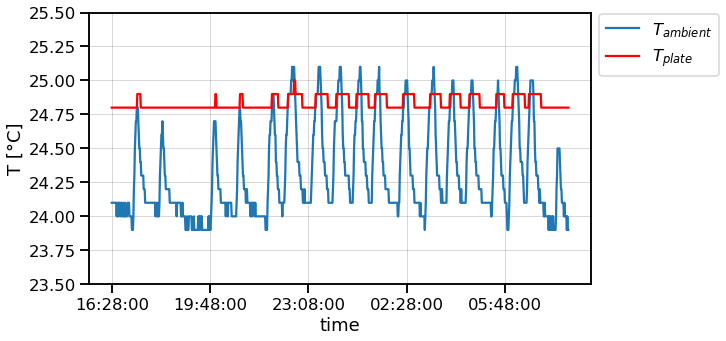

In [ ]:
fig, ax = plt.subplots(figsize=(9,5), nrows=1, ncols=1)
l1 = one_point_move_db.plot(x="time", y="T_ambient", legend=False, ax=ax, label="$T_{ambient}$")
l2 = one_point_move_db.plot(x="time", y="T_plate", ax=ax, legend=False, label="$T_{plate}$", color="r")
# ax2 = ax.twinx()
# l3 = one_point_move_db.plot(x="time", y="humidity", ax=ax2, legend=False, label="humidity", color="tab:cyan")

ax.set_ylim(23.5, 25.5)
# ax2.set_ylim(23.5, 25.5)
# ax2.set_yticklabels([])
# ax2.set_yticks([])
# fig.legend(bbox_to_anchor=(0.34, 0.8), loc="upper right")
fig.legend(bbox_to_anchor=(1.11, 0.79), loc='right')
plt.grid(c="grey", ls="-", lw=1, alpha=0.3)
ax.set_ylabel("T [°C]")
# ax.xaxis.tick_top()
# ax.xaxis.set_label_position('top') 
plt.show()

### humidity

Text(0, 0.5, 'humidity [%]')

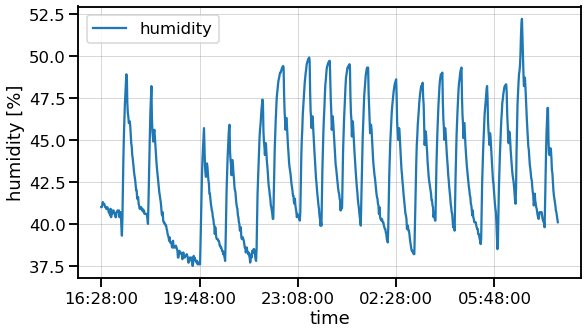

In [ ]:
ax = one_point_move_db.plot(x="time", y="humidity", figsize=(9,5))
plt.grid(c="grey", ls="-", lw=1, alpha=0.3)
ax.set_ylabel("humidity [%]")

### onepoint test correlation T and humidity

### T_hist

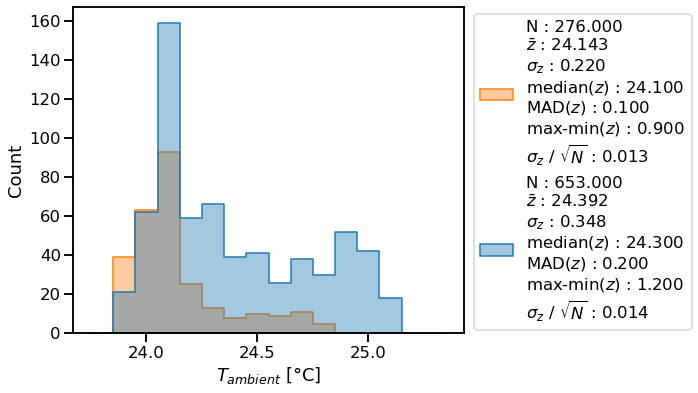

In [ ]:
from scipy import stats
from astropy.stats import knuth_bin_width
%matplotlib inline

one_point_move_db.query('time_h < 15')

data = one_point_move_db.query('time_h < 4.6')
_,label = tdp.hist_label_data(data['T_ambient'])
nbins = np.array(np.arange(23.8,25.5,0.1))-0.05
fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_ambient'],bins=nbins, kde=False, color='tab:orange',  ax=ax, element='step',  label=label, fill=True, alpha=0.4)


data = one_point_move_db.query('time_h > 4.6')
_,label = tdp.hist_label_data(data['T_ambient'])
# nbins = np.array(np.arange(24.5,25.5,0.1)) -0.5
# fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_ambient'],bins=nbins, kde=False,  ax=ax, element='step',  label=label, fill=True, alpha=0.4, color="tab:blue")

ax.set_xlabel('$T_{ambient}$ [°C]')
plt.legend(bbox_to_anchor=(1.6, 1), loc='upper right', borderaxespad=0.4)

0.0
0.000E+00
0.0015729194403874696
1.573E-03


<AxesSubplot:xlabel='T_ambient', ylabel='Count'>

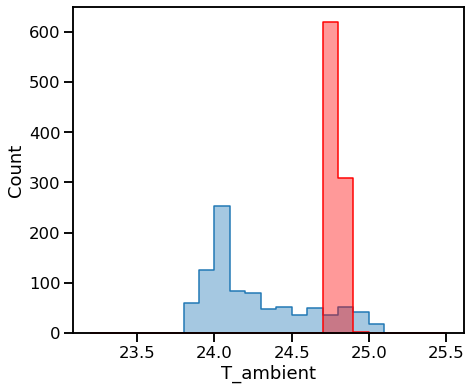

In [ ]:
from scipy import stats
from astropy.stats import knuth_bin_width
%matplotlib inline
sns.set_context("talk")
data = one_point_move_db
_,label = tdp.hist_label_data(data['T_ambient'])
nbins = np.array(np.arange(23.7,26,0.1)) -0.5
fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_ambient'],bins=nbins, kde=False,  ax=ax, element='step',  label=label, fill=True, alpha=0.4)


data = one_point_move_db
_,label = tdp.hist_label_data(data['T_plate'])
# nbins = np.array(np.arange(24.5,25.2,0.1))-0.05
# fig, ax = plt.subplots(figsize=(7,6), nrows=1, ncols=1)
sns.histplot(data['T_plate'],bins=nbins, kde=False,  ax=ax, element='step',  label=label, fill=True, alpha=0.4, color="red")

# Lao Light on and Off

In [20]:
# def query_temps_from_db(db_path, starttime, endtime):
#     """Reads the temperature and humidity data from the Logger_MADMAX.db
#         returns a pandas dataframe with relevant data. 
#         Start and end time in the following format: 'YYYY-MM-DD hh:mm:ss'
#         Eg: Starttime: '2021-10-18 16:15:49', Endtime: '2021-10-19 07:01:58' """
import sqlite3
import pandas as pd
conn = sqlite3.connect(db_path)
c = conn.cursor()

#* Query SQL data
sql_query = f"""SELECT  *
from manufact_logger
"""
#where timestamp between '2021-10-20 16:27:49' and '2021-11-19 08:44:00' 

c.execute(sql_query)
t = c.fetchall()
#* Read into dataframe
temp_humid_db = pd.DataFrame(t, columns=["date",
                        "T_plate",
                        "T_ambient",
                        "humidity", 
                        "dewpoint", 
                        "fan_speed"])
temp_humid_db['time'] = pd.to_datetime(temp_humid_db['date']).dt.strftime('%X')



In [21]:
temp_humid_db['fan_speed'].describe()
# temp_humid_db['fan_speed'].isna().sum()

count    53090.000000
mean        54.494632
std         37.281790
min          0.000000
25%          0.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: fan_speed, dtype: float64

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.]),
 [Text(-10000.0, 0, '2021-11-12 08:25'),
  Text(0.0, 0, '2021-08-02 14:26'),
  Text(10000.0, 0, '2021-08-09 13:06'),
  Text(20000.0, 0, '2021-10-22 11:20'),
  Text(30000.0, 0, '2021-11-01 03:40'),
  Text(40000.0, 0, '2021-11-08 02:20'),
  Text(50000.0, 0, '2021-11-17 03:38'),
  Text(60000.0, 0, '')])

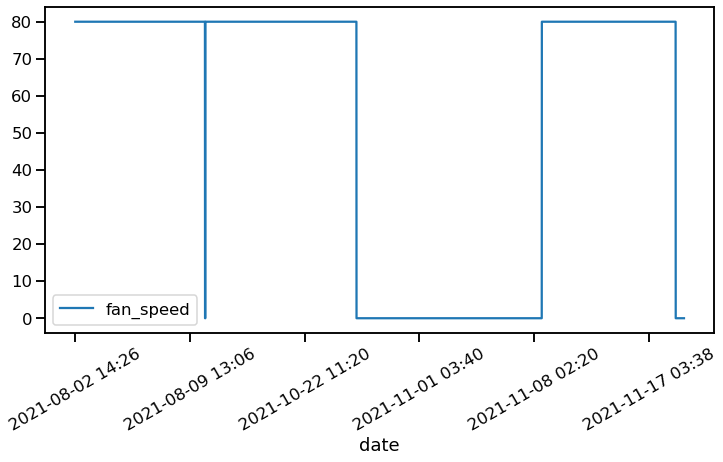

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6), nrows=1, ncols=1)
temp_humid_db.plot(x='date', y='fan_speed', ax=ax)
plt.xticks(rotation=30)

In [ ]:
klä